In [1]:
#Import all the required libraries
import pandas as pd
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
import pandas, numpy, string, textblob
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
import xgboost
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import sklearn.metrics as skl
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

Using TensorFlow backend.


In [2]:
#Input the data
trainDF = pd.read_csv("/Users/sainikhithamadduri/Desktop/DAEN 690 Project/stability_cleaned.csv")

In [3]:
#Divide into train and test set
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['text'], trainDF['label'],test_size=0.2)

In [4]:
#encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [5]:
#count vectors as features
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(trainDF['text'])

xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

In [6]:
#tf-idf word level
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=6000)
tfidf_vect.fit(trainDF['text'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)


In [7]:
#n-gram level tf-idf
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(trainDF['text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)


In [8]:
#character level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=4000)
tfidf_vect_ngram_chars.fit(trainDF['text'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 

In [12]:
#utility function
def train_model(classifier, feature_vector_train, label, feature_vector_valid,is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    print(confusion_matrix(valid_y, predictions))
    print(metrics.classification_report(valid_y, predictions, target_names=trainDF['label'].unique()))
    probs = classifier.predict_proba(feature_vector_valid)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    global auc 
    auc = roc_auc_score(valid_y, probs)
    print('AUC: %.3f' % auc)
    # calculate roc curve
    global fpr 
    global tpr
    fpr, tpr, thresholds = roc_curve(valid_y, probs)
    # plot no skill
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplot.plot(fpr, tpr, marker='.')
    # show the plot
    pyplot.show()
    print(fpr)
    print(tpr)
    global rsquared
    global mae
    global mse
    mae = metrics.mean_absolute_error(valid_y, predictions)  
    print('Mean Absolute Error:',mae)  
    mse = metrics.mean_squared_error(valid_y, predictions)
    print('Mean Squared Error:',mse)
    rsquared = np.sqrt(metrics.mean_squared_error(valid_y, predictions))
    print('R squared:',rsquared)
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

[[250   2]
 [ 57 156]]
              precision    recall  f1-score   support

   Stability       0.81      0.99      0.89       252
not relevant       0.99      0.73      0.84       213

   micro avg       0.87      0.87      0.87       465
   macro avg       0.90      0.86      0.87       465
weighted avg       0.89      0.87      0.87       465

AUC: 0.949


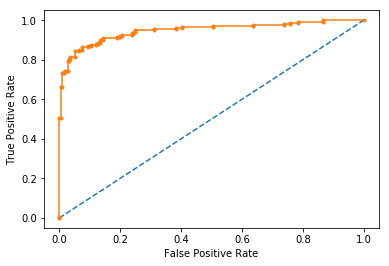

[0.         0.         0.         0.00396825 0.00396825 0.00793651
 0.00793651 0.01587302 0.01587302 0.01984127 0.01984127 0.02777778
 0.02777778 0.03174603 0.03174603 0.03571429 0.03571429 0.0515873
 0.0515873  0.06349206 0.06349206 0.07539683 0.07539683 0.0952381
 0.0952381  0.1031746  0.1031746  0.11904762 0.11904762 0.12698413
 0.12698413 0.13492063 0.13492063 0.14285714 0.14285714 0.19047619
 0.19047619 0.1984127  0.1984127  0.20634921 0.20634921 0.23809524
 0.23809524 0.24603175 0.24603175 0.25       0.25       0.30952381
 0.30952381 0.38492063 0.38492063 0.4047619  0.4047619  0.50396825
 0.50396825 0.63492063 0.63492063 0.73809524 0.73809524 0.75793651
 0.75793651 0.78571429 0.78571429 0.86507937 0.86507937 1.        ]
[0.         0.00469484 0.50704225 0.50704225 0.66197183 0.66197183
 0.73239437 0.73239437 0.7370892  0.7370892  0.74178404 0.74178404
 0.79342723 0.79342723 0.8028169  0.8028169  0.81220657 0.81220657
 0.84507042 0.84507042 0.84976526 0.84976526 0.86384977 0.86384

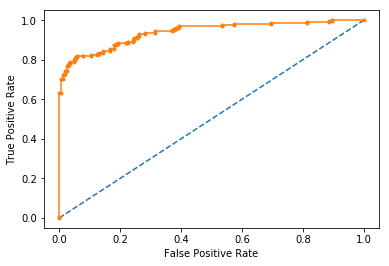

[0.         0.         0.         0.00396825 0.00396825 0.01190476
 0.01190476 0.01587302 0.01587302 0.01984127 0.01984127 0.02380952
 0.02380952 0.02777778 0.02777778 0.03174603 0.03174603 0.03571429
 0.03571429 0.04761905 0.04761905 0.0515873  0.0515873  0.05555556
 0.05555556 0.05952381 0.05952381 0.07936508 0.07936508 0.1031746
 0.1031746  0.12301587 0.12301587 0.13095238 0.13095238 0.14285714
 0.14285714 0.16666667 0.16666667 0.17857143 0.17857143 0.18650794
 0.18650794 0.19444444 0.19444444 0.21825397 0.21825397 0.22619048
 0.22619048 0.24206349 0.24206349 0.24603175 0.24603175 0.25396825
 0.25396825 0.25793651 0.25793651 0.26190476 0.26190476 0.28174603
 0.28174603 0.31349206 0.31349206 0.36904762 0.36904762 0.37698413
 0.37698413 0.38492063 0.38492063 0.38888889 0.38888889 0.39285714
 0.39285714 0.53571429 0.53571429 0.57539683 0.57539683 0.69444444
 0.69444444 0.81349206 0.81349206 0.88492063 0.88492063 0.8968254
 0.8968254  1.        ]
[0.         0.00469484 0.63380282 0.6338

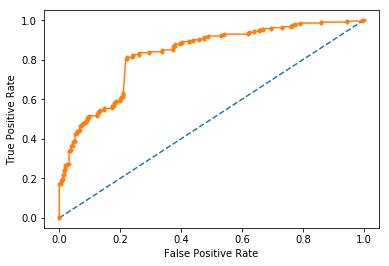

[0.         0.         0.         0.00396825 0.00396825 0.00793651
 0.00793651 0.01190476 0.01190476 0.01587302 0.01587302 0.01587302
 0.01984127 0.01984127 0.01984127 0.01984127 0.02380952 0.02380952
 0.03174603 0.03174603 0.03571429 0.03571429 0.03968254 0.03968254
 0.04365079 0.04365079 0.04761905 0.04761905 0.0515873  0.0515873
 0.05555556 0.05555556 0.05952381 0.05952381 0.06349206 0.06349206
 0.06746032 0.06746032 0.07142857 0.07142857 0.07539683 0.07539683
 0.07936508 0.07936508 0.08333333 0.08333333 0.08730159 0.08730159
 0.09126984 0.09126984 0.09126984 0.0952381  0.0952381  0.09920635
 0.09920635 0.12301587 0.12301587 0.12698413 0.12698413 0.13095238
 0.13095238 0.13492063 0.13492063 0.1468254  0.1468254  0.17460317
 0.17460317 0.17857143 0.17857143 0.18253968 0.18253968 0.18650794
 0.18650794 0.1984127  0.1984127  0.20238095 0.20238095 0.21031746
 0.21031746 0.21031746 0.21031746 0.21825397 0.22222222 0.22222222
 0.23809524 0.23809524 0.24206349 0.24206349 0.26190476 0.26190

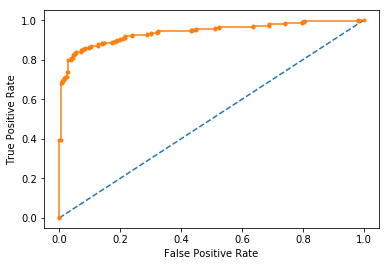

[0.         0.         0.         0.00396825 0.00396825 0.00793651
 0.00793651 0.01190476 0.01190476 0.01587302 0.01587302 0.01984127
 0.01984127 0.02380952 0.02380952 0.02777778 0.02777778 0.03968254
 0.03968254 0.04365079 0.04365079 0.04761905 0.04761905 0.0515873
 0.0515873  0.05555556 0.05555556 0.07142857 0.07142857 0.07936508
 0.07936508 0.08333333 0.08333333 0.09920635 0.09920635 0.1031746
 0.1031746  0.12698413 0.12698413 0.13888889 0.13888889 0.1468254
 0.1468254  0.17460317 0.17460317 0.18253968 0.18253968 0.19047619
 0.19047619 0.1984127  0.1984127  0.21031746 0.21031746 0.21428571
 0.21428571 0.23809524 0.23809524 0.28968254 0.28968254 0.3015873
 0.3015873  0.32142857 0.32142857 0.32539683 0.32539683 0.43253968
 0.43253968 0.44047619 0.44047619 0.4484127  0.4484127  0.51190476
 0.51190476 0.52380952 0.52380952 0.63492063 0.63492063 0.69047619
 0.69047619 0.74206349 0.74206349 0.79761905 0.79761905 0.80555556
 0.80555556 0.98015873 0.98015873 1.        ]
[0.         0.004694

In [13]:
# Naive Bayes on Count Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print ("Naive Bayes accuracy using Count Vectors as features: ", accuracy)
#Exporting data to csv for visualizations
# pd.DataFrame({
#     "AUC": auc.tolist(),
#     "sensitivity": fpr.tolist(),
#     "1-specificity": tpr.tolist(),
#     "Accuracy": accuracy.tolist(),
#     "R Squared": rsquared.tolist(),
#     "MAE": mae.tolist(),
#     "MSE": mse.tolist()
#      }).to_csv("growth_curves_count vectors_Naive Bayes.csv")

# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("Naive Bayes accuracy using WordLevel TF-IDF as features: ", accuracy)
# Exporting data to csv for visualizations
# pd.DataFrame({
#     "AUC": auc.tolist(),
#     "sensitivity": fpr.tolist(),
#     "1-specificity": tpr.tolist(),
#     "Accuracy": accuracy.tolist(),
#     "R Squared": rsquared.tolist(),
#     "MAE": mae.tolist(),
#     "MSE": mse.tolist()
#      }).to_csv("growth_curves_word tf-idf_Naive Bayes.csv")

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("Naive Bayes accuracy using N-Gram Vectors as features: ", accuracy)
# Exporting data to csv for visualizations
# pd.DataFrame({
#     "AUC": auc.tolist(),
#     "sensitivity": fpr.tolist(),
#     "1-specificity": tpr.tolist(),
#     "Accuracy": accuracy.tolist(),
#     "R Squared": rsquared.tolist(),
#     "MAE": mae.tolist(),
#     "MSE": mse.tolist()
#      }).to_csv("growth_curves_ngram tf-idf_Naive Bayes.csv")

# Naive Bayes on Character Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("Naive Bayes accuracy using CharLevel Vectors as features: ", accuracy)
# Exporting data to csv for visualizations
# pd.DataFrame({
#     "AUC": auc.tolist(),
#     "sensitivity": fpr.tolist(),
#     "1-specificity": tpr.tolist(),
#     "Accuracy": accuracy.tolist(),
#     "R Squared": rsquared.tolist(),
#     "MAE": mae.tolist(),
#     "MSE": mse.tolist()
#      }).to_csv("growth_curves_char tf-idf_Naive Bayes.csv")

[[247   5]
 [ 19 194]]
              precision    recall  f1-score   support

   Stability       0.93      0.98      0.95       252
not relevant       0.97      0.91      0.94       213

   micro avg       0.95      0.95      0.95       465
   macro avg       0.95      0.95      0.95       465
weighted avg       0.95      0.95      0.95       465

AUC: 0.970


/Users/sainikhithamadduri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


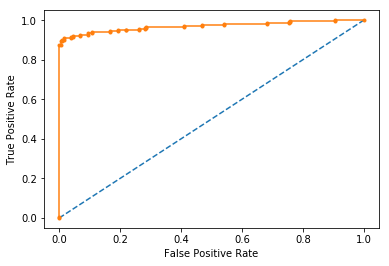

/Users/sainikhithamadduri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.         0.         0.         0.00396825 0.00396825 0.00793651
 0.00793651 0.01587302 0.01587302 0.03968254 0.03968254 0.04365079
 0.04365079 0.06746032 0.06746032 0.0952381  0.0952381  0.10714286
 0.10714286 0.16666667 0.16666667 0.19444444 0.19444444 0.21825397
 0.21825397 0.26190476 0.26190476 0.28174603 0.28174603 0.28571429
 0.28571429 0.40873016 0.40873016 0.46825397 0.46825397 0.53968254
 0.53968254 0.68253968 0.68253968 0.75396825 0.75396825 0.75793651
 0.75793651 0.9047619  0.9047619  1.        ]
[0.         0.00469484 0.87323944 0.87323944 0.89671362 0.89671362
 0.90140845 0.90140845 0.91079812 0.91079812 0.91549296 0.91549296
 0.92018779 0.92018779 0.92488263 0.92488263 0.9342723  0.9342723
 0.93896714 0.93896714 0.94366197 0.94366197 0.94835681 0.94835681
 0.95305164 0.95305164 0.95774648 0.95774648 0.96244131 0.96244131
 0.96713615 0.96713615 0.97183099 0.97183099 0.97652582 0.97652582
 0.98122066 0.98122066 0.98591549 0.98591549 0.99061033 0.99061033
 0.99530516 0.995

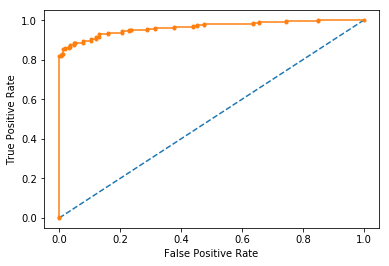

[0.         0.         0.         0.00396825 0.00396825 0.00793651
 0.00793651 0.01190476 0.01190476 0.01984127 0.01984127 0.03174603
 0.03174603 0.03571429 0.03571429 0.04761905 0.04761905 0.0515873
 0.0515873  0.07936508 0.07936508 0.1031746  0.1031746  0.11904762
 0.11904762 0.13095238 0.13095238 0.15873016 0.15873016 0.20634921
 0.20634921 0.23015873 0.23015873 0.23412698 0.23412698 0.28968254
 0.28968254 0.31349206 0.31349206 0.37698413 0.37698413 0.44047619
 0.44047619 0.45238095 0.45238095 0.47619048 0.47619048 0.63492063
 0.63492063 0.6547619  0.6547619  0.74603175 0.74603175 0.84920635
 0.84920635 1.        ]
[0.         0.00469484 0.82159624 0.82159624 0.82629108 0.82629108
 0.83098592 0.83098592 0.85446009 0.85446009 0.85915493 0.85915493
 0.86384977 0.86384977 0.87323944 0.87323944 0.88262911 0.88262911
 0.88732394 0.88732394 0.89671362 0.89671362 0.90610329 0.90610329
 0.91549296 0.91549296 0.92957746 0.92957746 0.9342723  0.9342723
 0.94366197 0.94366197 0.94835681 0.9483

/Users/sainikhithamadduri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


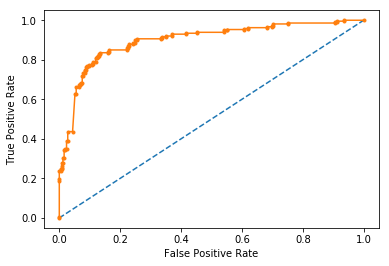

[0.         0.         0.         0.         0.         0.00396825
 0.00396825 0.00793651 0.00793651 0.00793651 0.00793651 0.01190476
 0.01190476 0.01587302 0.01587302 0.01984127 0.01984127 0.02380952
 0.02380952 0.02777778 0.02777778 0.04365079 0.0515873  0.05555556
 0.05555556 0.06349206 0.06349206 0.06746032 0.06746032 0.07142857
 0.07142857 0.07539683 0.07539683 0.07936508 0.07936508 0.08333333
 0.08333333 0.08333333 0.08730159 0.08730159 0.09126984 0.09126984
 0.09920635 0.09920635 0.10714286 0.10714286 0.11111111 0.11111111
 0.11904762 0.11904762 0.12301587 0.12301587 0.12698413 0.12698413
 0.13095238 0.13095238 0.13492063 0.13492063 0.15873016 0.15873016
 0.16269841 0.16269841 0.22222222 0.22222222 0.22619048 0.22619048
 0.23015873 0.23015873 0.24206349 0.24206349 0.25       0.25
 0.25396825 0.25396825 0.33333333 0.33333333 0.33730159 0.33730159
 0.34920635 0.34920635 0.36904762 0.36904762 0.41666667 0.41666667
 0.45238095 0.45238095 0.53968254 0.53968254 0.5515873  0.5515873
 0

/Users/sainikhithamadduri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[242  10]
 [ 26 187]]
              precision    recall  f1-score   support

   Stability       0.90      0.96      0.93       252
not relevant       0.95      0.88      0.91       213

   micro avg       0.92      0.92      0.92       465
   macro avg       0.93      0.92      0.92       465
weighted avg       0.92      0.92      0.92       465

AUC: 0.958


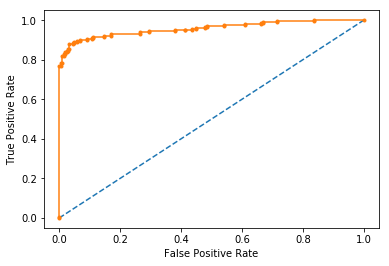

[0.         0.         0.         0.00396825 0.00396825 0.00793651
 0.00793651 0.01587302 0.01587302 0.01984127 0.01984127 0.02380952
 0.02380952 0.02777778 0.02777778 0.03174603 0.03174603 0.04365079
 0.04365079 0.04761905 0.04761905 0.05952381 0.05952381 0.06746032
 0.06746032 0.09126984 0.09126984 0.10714286 0.10714286 0.11111111
 0.11111111 0.1468254  0.1468254  0.17063492 0.17063492 0.26587302
 0.26587302 0.29365079 0.29365079 0.38095238 0.38095238 0.41269841
 0.41269841 0.43650794 0.43650794 0.4484127  0.4484127  0.48015873
 0.48015873 0.48412698 0.48412698 0.53968254 0.53968254 0.61111111
 0.61111111 0.66269841 0.66269841 0.67063492 0.67063492 0.71428571
 0.71428571 0.83730159 0.83730159 1.        ]
[0.         0.00469484 0.76995305 0.76995305 0.78403756 0.78403756
 0.82159624 0.82159624 0.83098592 0.83098592 0.84037559 0.84037559
 0.84507042 0.84507042 0.85446009 0.85446009 0.87793427 0.87793427
 0.88732394 0.88732394 0.89201878 0.89201878 0.89671362 0.89671362
 0.90140845 0.90

In [14]:
# Linear Classifier on Count Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count)
print ("Linear Classifier accuracy using Count Vectors as features: ", accuracy)
# Exporting data to csv for visualizations
# pd.DataFrame({
#     "AUC": auc.tolist(),
#     "sensitivity": fpr.tolist(),
#     "1-specificity": tpr.tolist(),
#     "Accuracy": accuracy.tolist(),
#     "R Squared": rsquared.tolist(),
#     "MAE": mae.tolist(),
#     "MSE": mse.tolist()
#      }).to_csv("growth_curves_count vectors_Linear Regression.csv")

# Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("Linear Classifier accuracy using WordLevel TF-IDF as features: ", accuracy)
# Exporting data to csv for visualizations
# pd.DataFrame({
#     "AUC": auc.tolist(),
#     "sensitivity": fpr.tolist(),
#     "1-specificity": tpr.tolist(),
#     "Accuracy": accuracy.tolist(),
#     "R Squared": rsquared.tolist(),
#     "MAE": mae.tolist(),
#     "MSE": mse.tolist()
#      }).to_csv("growth_curves_word tf-idf_Linear Regression.csv")

# Linear Classifier on Ngram Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("Linear Classifier accuracy using N-Gram Vectors as features: ", accuracy)
# Exporting data to csv for visualizations
# pd.DataFrame({
#     "AUC": auc.tolist(),
#     "sensitivity": fpr.tolist(),
#     "1-specificity": tpr.tolist(),
#     "Accuracy": accuracy.tolist(),
#     "R Squared": rsquared.tolist(),
#     "MAE": mae.tolist(),
#     "MSE": mse.tolist()
#      }).to_csv("growth_curves_ngram if-idf_Linear Regression.csv")

# Linear Classifier on Character Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("Linear Classifier accuracy using CharLevel Vectors as features: ", accuracy)
# Exporting data to csv for visualizations
# pd.DataFrame({
#     "AUC": auc.tolist(),
#     "sensitivity": fpr.tolist(),
#     "1-specificity": tpr.tolist(),
#     "Accuracy": accuracy.tolist(),
#     "R Squared": rsquared.tolist(),
#     "MAE": mae.tolist(),
#     "MSE": mse.tolist()
#      }).to_csv("growth_curves_char tf-idf_Linear Regression.csv")

[[244   8]
 [ 50 163]]


/Users/sainikhithamadduri/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

   Stability       0.83      0.97      0.89       252
not relevant       0.95      0.77      0.85       213

   micro avg       0.88      0.88      0.88       465
   macro avg       0.89      0.87      0.87       465
weighted avg       0.89      0.88      0.87       465

AUC: 0.940


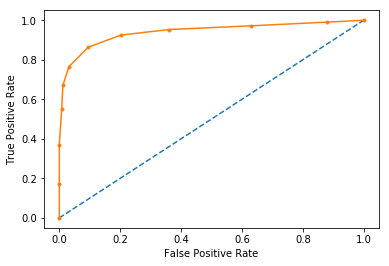

[0.         0.         0.         0.00793651 0.01190476 0.03174603
 0.0952381  0.20238095 0.36111111 0.63095238 0.88095238 1.        ]
[0.         0.17370892 0.37089202 0.54929577 0.6713615  0.76525822
 0.86384977 0.92488263 0.95305164 0.97183099 0.99061033 1.        ]
Mean Absolute Error: 0.12473118279569892
Mean Squared Error: 0.12473118279569892
R squared: 0.35317302104733156
Random Forest accuracy using Count Vectors as features:  0.875268817204301
[[247   5]
 [ 41 172]]
              precision    recall  f1-score   support

   Stability       0.86      0.98      0.91       252
not relevant       0.97      0.81      0.88       213

   micro avg       0.90      0.90      0.90       465
   macro avg       0.91      0.89      0.90       465
weighted avg       0.91      0.90      0.90       465

AUC: 0.947


/Users/sainikhithamadduri/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


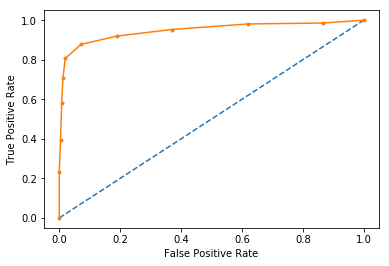

[0.         0.         0.00396825 0.00793651 0.01190476 0.01984127
 0.07142857 0.19047619 0.36904762 0.61904762 0.86507937 1.        ]
[0.         0.23474178 0.3943662  0.58215962 0.70892019 0.80751174
 0.87793427 0.92018779 0.95305164 0.98122066 0.98591549 1.        ]
Mean Absolute Error: 0.0989247311827957
Mean Squared Error: 0.0989247311827957
R squared: 0.31452302170555924
Random Forest accuracy using WordLevel TF-IDF as features:  0.9010752688172043
[[189  63]
 [ 27 186]]
              precision    recall  f1-score   support

   Stability       0.88      0.75      0.81       252
not relevant       0.75      0.87      0.81       213

   micro avg       0.81      0.81      0.81       465
   macro avg       0.81      0.81      0.81       465
weighted avg       0.82      0.81      0.81       465

AUC: 0.896


/Users/sainikhithamadduri/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


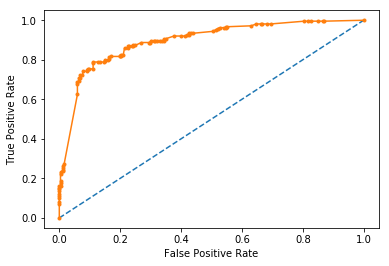

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00396825 0.00396825
 0.00396825 0.00396825 0.00396825 0.01190476 0.01190476 0.01190476
 0.01190476 0.01587302 0.05952381 0.05952381 0.05952381 0.06349206
 0.06349206 0.06746032 0.06746032 0.07539683 0.07936508 0.09126984
 0.09126984 0.0952381  0.09920635 0.11111111 0.11111111 0.11111111
 0.12698413 0.13492063 0.1468254  0.15079365 0.15079365 0.15873016
 0.16269841 0.16269841 0.17063492 0.1984127  0.1984127  0.20238095
 0.20238095 0.21031746 0.21428571 0.22619048 0.22619048 0.23015873
 0.23809524 0.24206349 0.24206349 0.25       0.26984127 0.29365079
 0.29761905 0.3015873  0.30952381 0.31349206 0.32142857 0.32936508
 0.33730159 0.3452381  0.3452381  0.34920635 0.37698413 0.40079365
 0.41269841 0.42063492 0.42460317 0.42460317 0.43253968 0.44047619
 0.50396825 0.51587302 0.51984127 0.52777778 0.53968254 0.54761905
 0.54761905 0.5515873  0.63095238 0.6468254  0.66269841 0.66666667
 0.

/Users/sainikhithamadduri/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[247   5]
 [ 39 174]]
              precision    recall  f1-score   support

   Stability       0.86      0.98      0.92       252
not relevant       0.97      0.82      0.89       213

   micro avg       0.91      0.91      0.91       465
   macro avg       0.92      0.90      0.90       465
weighted avg       0.91      0.91      0.90       465

AUC: 0.952


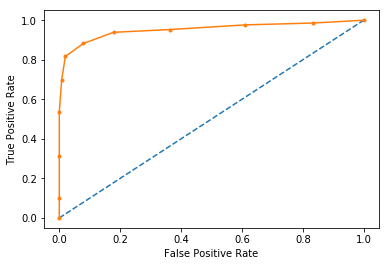

[0.         0.         0.         0.         0.00793651 0.01984127
 0.07936508 0.17857143 0.36507937 0.61111111 0.83333333 1.        ]
[0.         0.09859155 0.31455399 0.53521127 0.69953052 0.81690141
 0.88262911 0.93896714 0.95305164 0.97652582 0.98591549 1.        ]
Mean Absolute Error: 0.09462365591397849
Mean Squared Error: 0.09462365591397849
R squared: 0.3076095835860425
Random Forest accuracy  using CharLevel Vectors as features:  0.9053763440860215


In [15]:
# RF on bag of words
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count)
print ("Random Forest accuracy using Count Vectors as features: ", accuracy)
# Exporting data to csv for visualizations
# pd.DataFrame({
#     "AUC": auc.tolist(),
#     "sensitivity": fpr.tolist(),
#     "1-specificity": tpr.tolist(),
#     "Accuracy": accuracy.tolist(),
#     "R Squared": rsquared.tolist(),
#     "MAE": mae.tolist(),
#     "MSE": mse.tolist()
#      }).to_csv("growth_curves_count vectors_Random Forest.csv")

# RF on Word Level TF IDF Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("Random Forest accuracy using WordLevel TF-IDF as features: ", accuracy)
# pd.DataFrame({
#     "AUC": auc.tolist(),
#     "sensitivity": fpr.tolist(),
#     "1-specificity": tpr.tolist(),
#     "Accuracy": accuracy.tolist(),
#     "R Squared": rsquared.tolist(),
#     "MAE": mae.tolist(),
#     "MSE": mse.tolist()
#      }).to_csv("growth_curves_word tf-idf_Random Forest.csv")

# RF on n-gram Level TF IDF Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("Random Forest accuracy  using N-Gram Vectors as features: ", accuracy)
# Exporting data to csv for visualizations
# pd.DataFrame({
#     "AUC": auc.tolist(),
#     "sensitivity": fpr.tolist(),
#     "1-specificity": tpr.tolist(),
#     "Accuracy": accuracy.tolist(),
#     "R Squared": rsquared.tolist(),
#     "MAE": mae.tolist(),
#     "MSE": mse.tolist()
#      }).to_csv("growth_curves_ngram if-idf_Linear Regression.csv")

# RF on char Level TF IDF Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("Random Forest accuracy  using CharLevel Vectors as features: ", accuracy)
# Exporting data to csv for visualizations
# pd.DataFrame({
#     "AUC": auc.tolist(),
#     "sensitivity": fpr.tolist(),
#     "1-specificity": tpr.tolist(),
#     "Accuracy": accuracy.tolist(),
#     "R Squared": rsquared.tolist(),
#     "MAE": mae.tolist(),
#     "MSE": mse.tolist()
#      }).to_csv("growth_curves_char tf-idf_Linear Regression.csv")

[[249   3]
 [ 18 195]]
              precision    recall  f1-score   support

   Stability       0.93      0.99      0.96       252
not relevant       0.98      0.92      0.95       213

   micro avg       0.95      0.95      0.95       465
   macro avg       0.96      0.95      0.95       465
weighted avg       0.96      0.95      0.95       465

AUC: 0.972


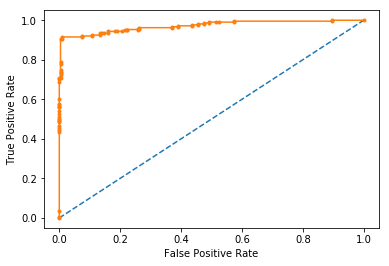

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00396825 0.00396825
 0.00396825 0.00396825 0.00396825 0.00396825 0.00396825 0.00396825
 0.00793651 0.00793651 0.07539683 0.07539683 0.10714286 0.10714286
 0.13492063 0.13492063 0.13888889 0.1468254  0.15873016 0.15873016
 0.18253968 0.19047619 0.20634921 0.21428571 0.22222222 0.22222222
 0.25793651 0.25793651 0.26190476 0.26190476 0.36904762 0.36904762
 0.38888889 0.38888889 0.43650794 0.43650794 0.45634921 0.45634921
 0.47619048 0.47619048 0.49206349 0.49206349 0.51587302 0.52380952
 0.57539683 0.57539683 0.8968254  0.8968254  1.        ]
[0.         0.00469484 0.03286385 0.43661972 0.44600939 0.45539906
 0.46478873 0.48356808 0.48826291 0.49765258 0.50234742 0.51173709
 0.5258216  0.5399061  0.55868545 0.56338028 0.57276995 0.57746479
 0.60093897 0.68544601 0.7042

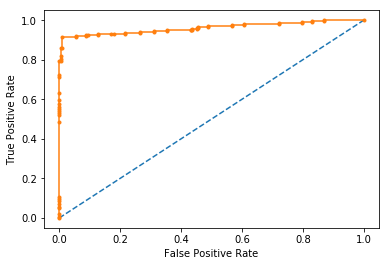

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00396825 0.00396825 0.00396825
 0.00396825 0.00793651 0.00793651 0.05555556 0.05555556 0.08730159
 0.08730159 0.0952381  0.12698413 0.12698413 0.17063492 0.17857143
 0.21428571 0.21428571 0.26587302 0.26587302 0.30952381 0.30952381
 0.3531746  0.3531746  0.43253968 0.43253968 0.43650794 0.43650794
 0.45238095 0.45238095 0.45634921 0.45634921 0.48809524 0.48809524
 0.56746032 0.56746032 0.60714286 0.60714286 0.72222222 0.72222222
 0.79761905 0.79761905 0.82936508 0.82936508 0.86904762 0.86904762
 1.        ]
[0.         0.00469484 0.01877934 0.05164319 0.05633803 0.07042254
 0.08450704 0.09389671 0.10798122 0.48356808 0.52112676 0.53051643
 0.5399061  0.54929577 0.55868545 0.57746479 0.59624413 0.63380282
 0.71361502 0.72300469 0.79342723 0.79342723 0.8028169  0.81690141
 0.859

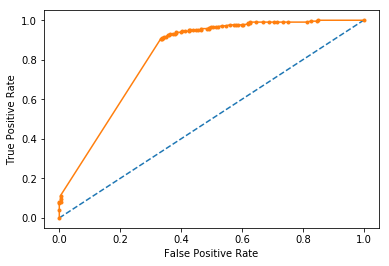

[0.         0.         0.         0.         0.00396825 0.00396825
 0.00396825 0.33333333 0.33730159 0.33730159 0.34126984 0.3452381
 0.34920635 0.35714286 0.36111111 0.36507937 0.37301587 0.38095238
 0.38492063 0.38492063 0.40079365 0.4047619  0.41269841 0.42460317
 0.42460317 0.42857143 0.44047619 0.4484127  0.45634921 0.46428571
 0.46428571 0.48412698 0.49206349 0.49206349 0.5        0.50396825
 0.51587302 0.51984127 0.53571429 0.54761905 0.55952381 0.57539683
 0.57936508 0.58730159 0.59920635 0.6031746  0.61904762 0.61904762
 0.62698413 0.62698413 0.6468254  0.67063492 0.69047619 0.70634921
 0.71428571 0.73412698 0.75       0.81349206 0.82539683 0.8452381
 0.84920635 1.        ]
[0.         0.04225352 0.07511737 0.07981221 0.07981221 0.09389671
 0.11267606 0.90610329 0.90610329 0.91079812 0.91079812 0.91549296
 0.91549296 0.92488263 0.92488263 0.92957746 0.92957746 0.92957746
 0.9342723  0.93896714 0.93896714 0.94366197 0.94366197 0.94366197
 0.94835681 0.94835681 0.94835681 0.9483

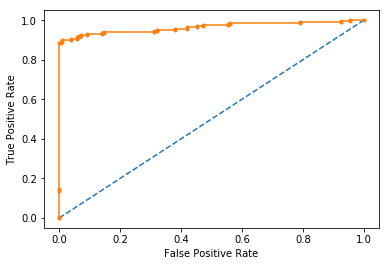

[0.         0.         0.         0.         0.         0.00396825
 0.00396825 0.00793651 0.00793651 0.03968254 0.03968254 0.05952381
 0.05952381 0.06349206 0.06349206 0.07142857 0.07142857 0.09126984
 0.09126984 0.13888889 0.13888889 0.1468254  0.1468254  0.30952381
 0.30952381 0.32142857 0.32142857 0.38095238 0.38095238 0.42063492
 0.42063492 0.45238095 0.45238095 0.47222222 0.47222222 0.55555556
 0.55555556 0.55952381 0.55952381 0.78968254 0.78968254 0.92460317
 0.92460317 0.95634921 0.95634921 1.        ]
[0.         0.00469484 0.13615023 0.14553991 0.88732394 0.88732394
 0.89201878 0.89201878 0.90140845 0.90140845 0.90610329 0.90610329
 0.91549296 0.91549296 0.92018779 0.92018779 0.92488263 0.92488263
 0.92957746 0.92957746 0.9342723  0.9342723  0.93896714 0.93896714
 0.94366197 0.94366197 0.94835681 0.94835681 0.95774648 0.95774648
 0.96713615 0.96713615 0.97183099 0.97183099 0.97652582 0.97652582
 0.98122066 0.98122066 0.98591549 0.98591549 0.99061033 0.99061033
 0.99530516 0.99

In [16]:
# Extereme Gradient Boosting on Count Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_count.tocsc(), train_y, xvalid_count.tocsc())
print ("Gradient Boosting using Count Vectors as features: ", accuracy)
# Exporting data to csv for visualizations
# pd.DataFrame({
#     "AUC": auc.tolist(),
#     "sensitivity": fpr.tolist(),
#     "1-specificity": tpr.tolist(),
#     "Accuracy": accuracy.tolist(),
#     "R Squared": rsquared.tolist(),
#     "MAE": mae.tolist(),
#     "MSE": mse.tolist()
#      }).to_csv("growth_curves_count vectors_XGB.csv")

# Extereme Gradient Boosting on Word Level TF IDF Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_tfidf.tocsc(), train_y, xvalid_tfidf.tocsc())
print ("Gradient Boosting using  WordLevel TF-IDF as features: ", accuracy)
# Exporting data to csv for visualizations
# pd.DataFrame({
#     "AUC": auc.tolist(),
#     "sensitivity": fpr.tolist(),
#     "1-specificity": tpr.tolist(),
#     "Accuracy": accuracy.tolist(),
#     "R Squared": rsquared.tolist(),
#     "MAE": mae.tolist(),
#     "MSE": mse.tolist()
#      }).to_csv("growth_curves_word tf-idf_XGB.csv")
# Extereme Gradient Boosting on Character Level TF IDF Vectors

accuracy = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("Gradient Boosting using N-Gram Vectors as features: ", accuracy)
# Exporting data to csv for visualizations
# pd.DataFrame({
#     "AUC": auc.tolist(),
#     "sensitivity": fpr.tolist(),
#     "1-specificity": tpr.tolist(),
#     "Accuracy": accuracy.tolist(),
#     "R Squared": rsquared.tolist(),
#     "MAE": mae.tolist(),
#     "MSE": mse.tolist()
#      }).to_csv("growth_curves_ngram if-idf_Linear Regression.csv")

accuracy = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram_chars.tocsc(), train_y, xvalid_tfidf_ngram_chars.tocsc())
print ("Gradient Boosting using  CharLevel Vectors as features: ", accuracy)
# Exporting data to csv for visualizations
# pd.DataFrame({
#     "AUC": auc.tolist(),
#     "sensitivity": fpr.tolist(),
#     "1-specificity": tpr.tolist(),
#     "Accuracy": accuracy.tolist(),
#     "R Squared": rsquared.tolist(),
#     "MAE": mae.tolist(),
#     "MSE": mse.tolist()
#      }).to_csv("growth_curves_char tf-idf_XGB.csv")

In [ ]:
#exporting tf-idf chars to csv 
pd.DataFrame({
    "feature": tfidf_vect_ngram_chars.get_feature_names(),
    "weight": tfidf_vect_ngram_chars.idf_.tolist()
}).to_csv("tfidf_ngram_chars_growth.csv")

In [ ]:
#exporting tf-idf n-gram to csv for visualizations
pd.DataFrame({
    "feature": tfidf_vect_ngram.get_feature_names(),
    "weight": tfidf_vect_ngram.idf_.tolist()
}).to_csv("tfidf_vect_ngram_growth.csv")

In [ ]:
##exporting tf-idf word to csv for visualizations
pd.DataFrame({
    "feature": tfidf_vect.get_feature_names(),
    "weight": tfidf_vect.idf_.tolist()
}).to_csv("tfidf_vect_word_growth.csv")

In [ ]:
#exporting bag of words to csv for visualizations
count_feat_weights = xtrain_count.toarray().sum(axis=0)
count_feat_weights = count_feat_weights/count_feat_weights.max()
pd.DataFrame({
    "feature": count_vect.get_feature_names(),
    "weight": count_feat_weights.tolist()
}).to_csv("count_vect_growth.csv")